In [2]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.colors as mplc

plt.rc('figure', dpi=150)

import numpy as np
import cv2

In [ ]:
im = np.zeros((7, 7))
im[1:-1, 1:-1] = 250
im[2, 3:5] = 255
im[4, 3:5] = 255
im = im/255
dendro_frames = [make_dendrogram(-im)]

for df in dendro_frames[0:1]:
    img = -df.im - (-df.im).min()
    plt.matshow(img, cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.show()
    final_map = np.zeros(df.im.shape)
    for b in df.branches:
        if b.mass_frac > 0.8:
            final_map += b.map
#         plt.matshow(b.map, cmap=plt.cm.Greys_r)
#         plt.colorbar()
#         plt.show()
    
    plt.matshow(final_map, cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.show()

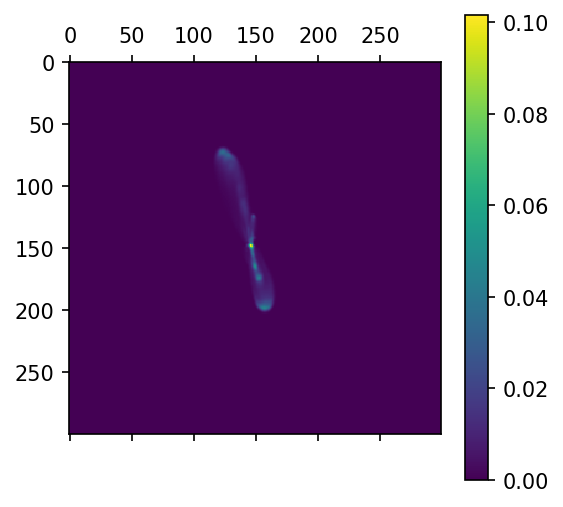

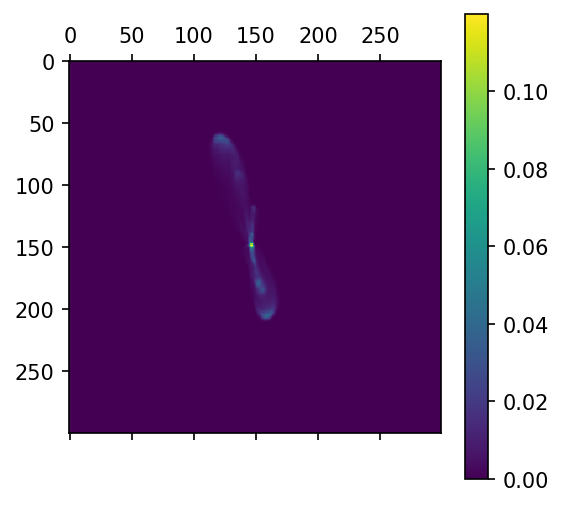

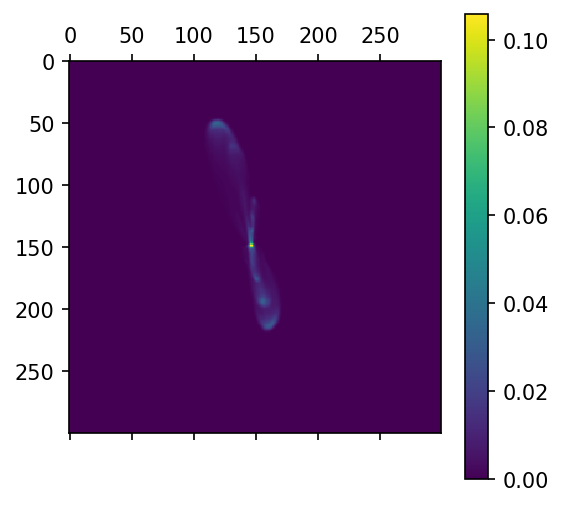

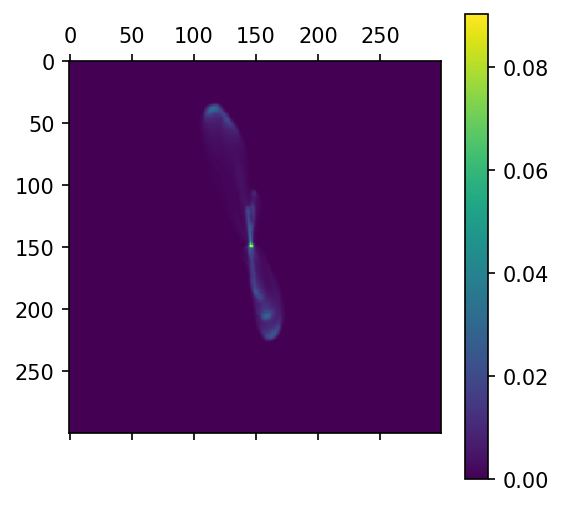

In [3]:
for frame_num in range(4):
    im = np.load('sim_data/z_{}.npy'.format(frame_num))
    im = cv2.resize(im, (300, 300))
    im = cv2.GaussianBlur(im, (3, 3), cv2.BORDER_CONSTANT)
    plt.matshow(im)
    plt.colorbar()

In [8]:
import importlib
import dendrogram
importlib.reload(dendrogram)
from dendrogram import *

def get_ellipse(cov):
    a, b, c = cov[0,0], cov[0,1], cov[1,1]
    c1 = (a+c)/2
    c2 = np.linalg.norm([b, (a-c)/2])
    l1 = c1 + c2
    l2 = c1 - c2
    assert l1 >= 0
    assert l2 >= 0
    theta = 0
    if b == 0 and a < c:
        theta = np.pi/2
    if b != 0:
        theta = np.arctan2(l1-a, b)
    t = np.linspace(0, 2*np.pi, 30)
    x = np.sqrt(l1)*np.cos(-theta)*np.cos(t) - np.sqrt(l2)*np.sin(-theta)*np.sin(t)
    y = np.sqrt(l1)*np.sin(-theta)*np.cos(t) + np.sqrt(l2)*np.cos(-theta)*np.sin(t)
    return x, y
    
frames = []
max_val = 0
for frame_num in range(4):
    im = np.load('sim_data/z_{}.npy'.format(frame_num))
    im = cv2.resize(im, (300, 300))
    im = cv2.GaussianBlur(im, (3, 3), cv2.BORDER_CONSTANT)
    frames.append(im)
    max_val = max(im.max(), max_val)
    
dendro_frames = []
for im in frames[0:2]:
    im /= max_val
    d = make_dendrogram(-im)
    dendro_frames.append(d)    
    

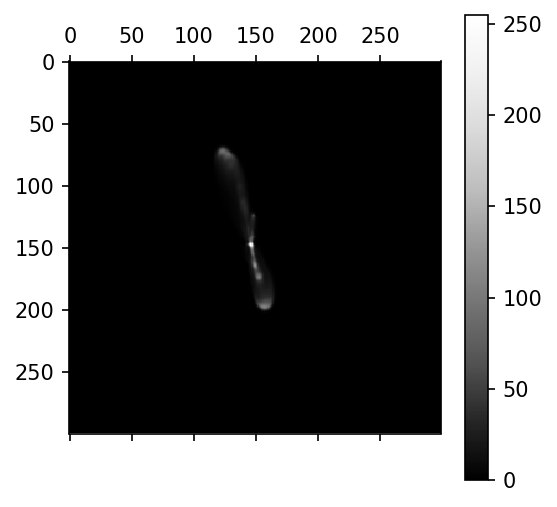

5382.0
106.0
372.0
538.0
2094.0
701.0
211.0
4285.0


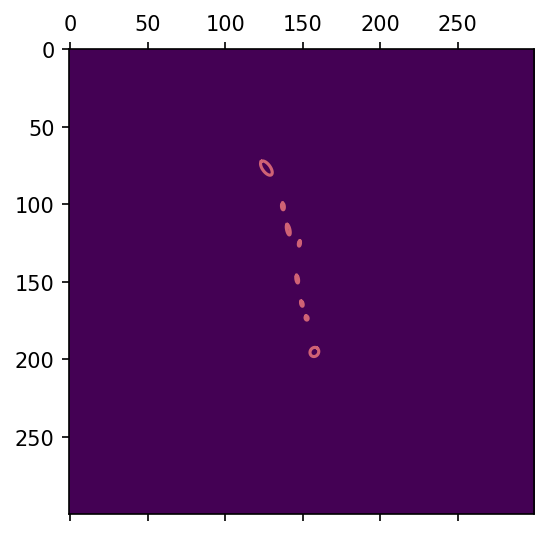

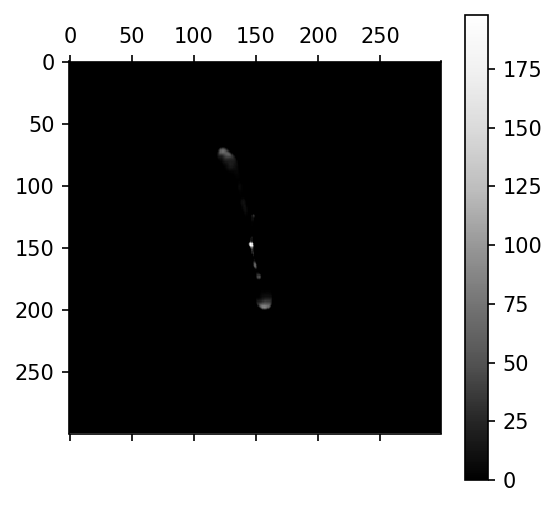

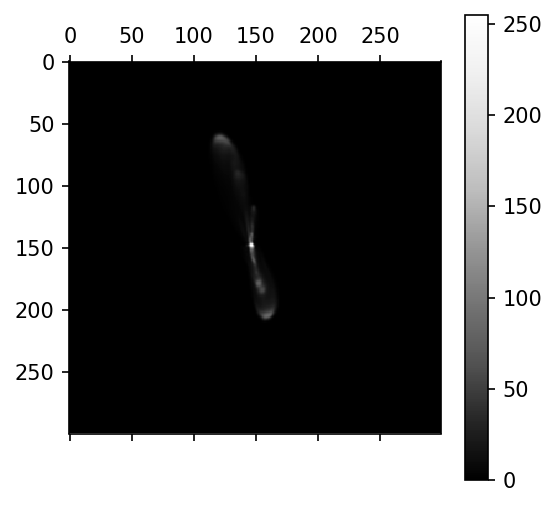

3899.0
345.0
124.0
51.0
16.0
1709.0
1408.0
3259.0


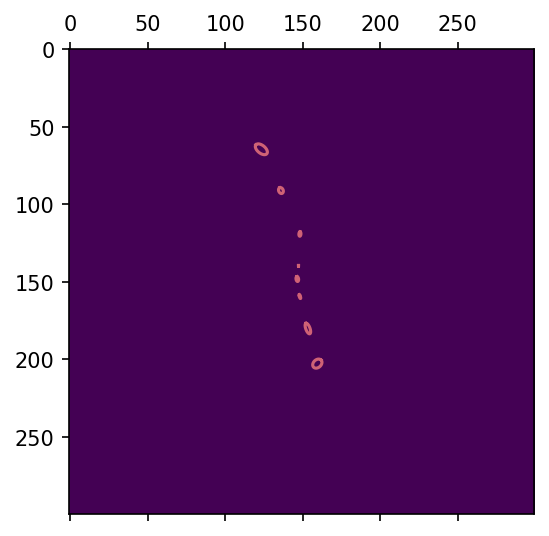

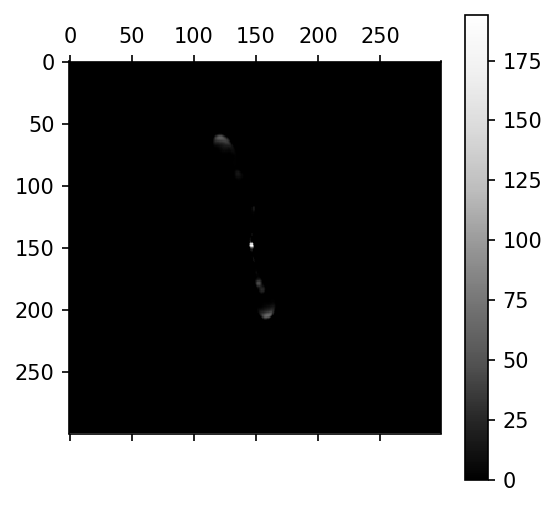

In [13]:
for df in dendro_frames:
    img = -df.im - (-df.im).min()
    plt.matshow(img, cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.show()
    final_map = np.zeros(df.im.shape)
    plt.matshow(final_map)
    for b in df.branches:
        if b.mass_frac > 0.8:
            print(b.mass)
            final_map += b.map
        
            x, y = get_ellipse(b.covariance)
            mu_x = b.x[0] + b.map.shape[1]//2
            mu_y = b.map.shape[0]//2 - b.x[1]
            x, y = x + mu_x, y + mu_y
            plt.plot(x, y, color='xkcd:rose')
    
    plt.matshow(final_map, cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.show()